In [1]:
#Dependancy 
import pandas as pd

In [2]:
recoveredURL="https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_recovered_global.csv&filename=time_series_covid19_recovered_global.csv"
recoveredCases = pd.read_csv(recoveredURL)

In [15]:
recoveredPerDay = recoveredCases[recoveredCases['Country/Region'].isin(['China', 'Italy','US'])].drop(['Province/State', 'Lat', 'Long'], axis=1)
recoveredPerDay = recoveredPerDay.groupby('Country/Region').sum()
recoveredPerDay = recoveredPerDay.T
recoveredPerDay.tail()

Country/Region,China,Italy,US
4/13/20,78039,35435,43482
4/14/20,78200,37130,47763
4/15/20,78311,38092,52096
4/16/20,78401,40164,54703
4/17/20,77552,42727,58545


In [20]:
recoveredPerDay.describe()

Country/Region,China,Italy,US
count,87.000000,87.000000,87.000000
mean,42574.172414,7314.344828,5966.091954
std,31730.056047,11798.482894,13648.010132
min,28.000000,0.000000,0.000000
25%,5649.500000,0.000000,3.000000
50%,52292.000000,414.000000,7.000000
75%,74450.500000,10655.500000,775.000000
max,78401.000000,42727.000000,58545.000000


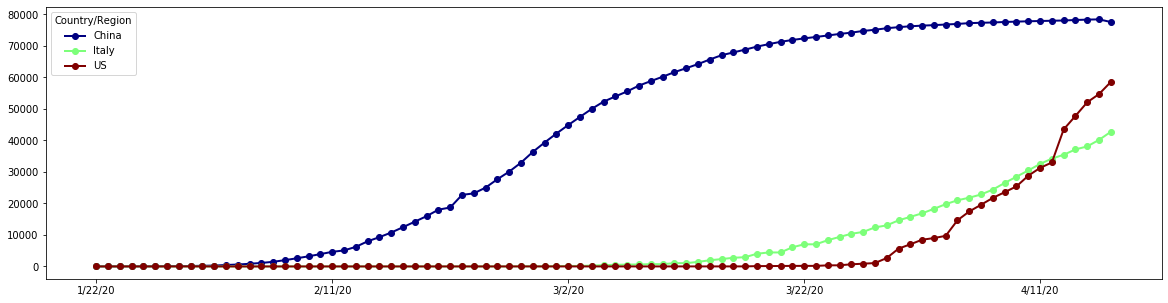

In [5]:
recoveredPerDay.plot(lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5))

In [21]:
newRecoveredPerDay = recoveredPerDay.diff()
newRecoveredPerDay.tail()

Country/Region,China,Italy,US
4/13/20,83.0,1224.0,10494.0
4/14/20,161.0,1695.0,4281.0
4/15/20,111.0,962.0,4333.0
4/16/20,90.0,2072.0,2607.0
4/17/20,-849.0,2563.0,3842.0


In [7]:
newRecoveredPerDay.describe()

Country/Region,China,Italy,US
count,86.000000,86.000000,86.000000
mean,901.441860,496.825581,680.755814
std,960.787577,700.355594,1587.083155
min,-849.000000,-1.000000,0.000000
25%,157.750000,0.000000,0.000000
50%,513.500000,35.000000,0.000000
75%,1461.500000,1016.250000,199.250000
max,3995.000000,2563.000000,10494.000000


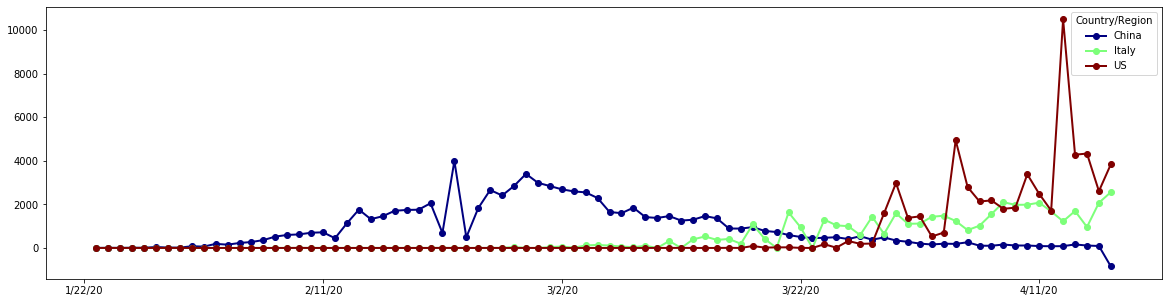

In [8]:
newRecoveredPerDay.plot(lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5))

importing Jupyter notebook from confirmid_cases.ipynb


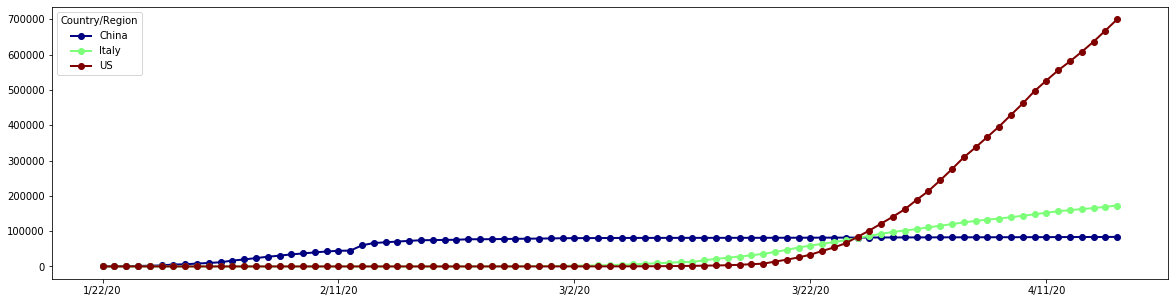

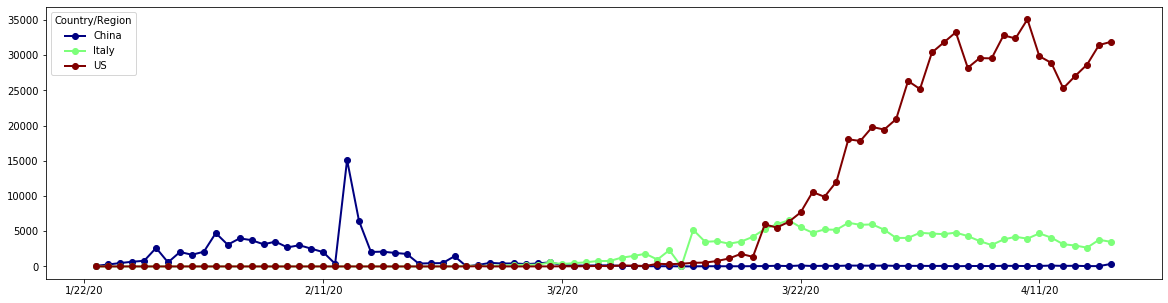

In [9]:
import import_ipynb
import confirmid_cases

In [10]:
confirmid_cases.newCasesPerDay
newCasesVsRecoveredPerDay = pd.merge(confirmid_cases.newCasesPerDay, newRecoveredPerDay, left_index=True, right_index=True, how='outer')
newCasesVsRecoveredPerDay = newCasesVsRecoveredPerDay.rename(columns={
    'China_x': 'China_confirmid',
    'China_y': 'China_Recovered',
    'Italy_x': 'Italy_confirmid',
    'Italy_y': 'Italy_Recovered',
    'US_x': 'US_confirmid',
    'US_y': 'US_Recovered'
})
newCasesVsRecoveredPerDay

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered
1/22/20,NaN,NaN,NaN,NaN,NaN,NaN
1/23/20,95.0,0.0,0.0,2.0,0.0,0.0
1/24/20,277.0,0.0,1.0,6.0,0.0,0.0
1/25/20,486.0,0.0,0.0,3.0,0.0,0.0
1/26/20,669.0,0.0,3.0,10.0,0.0,0.0
...,...,...,...,...,...,...
4/13/20,79.0,3153.0,25306.0,83.0,1224.0,10494.0
4/14/20,93.0,2972.0,27051.0,161.0,1695.0,4281.0
4/15/20,50.0,2667.0,28680.0,111.0,962.0,4333.0
4/16/20,47.0,3786.0,31451.0,90.0,2072.0,2607.0


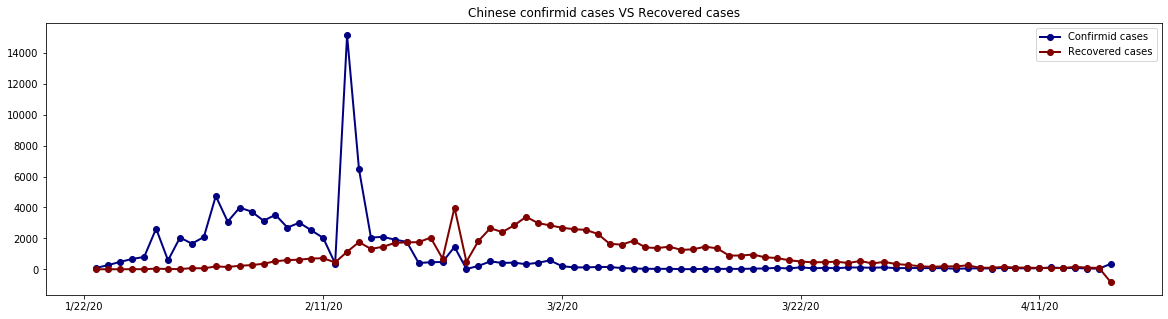

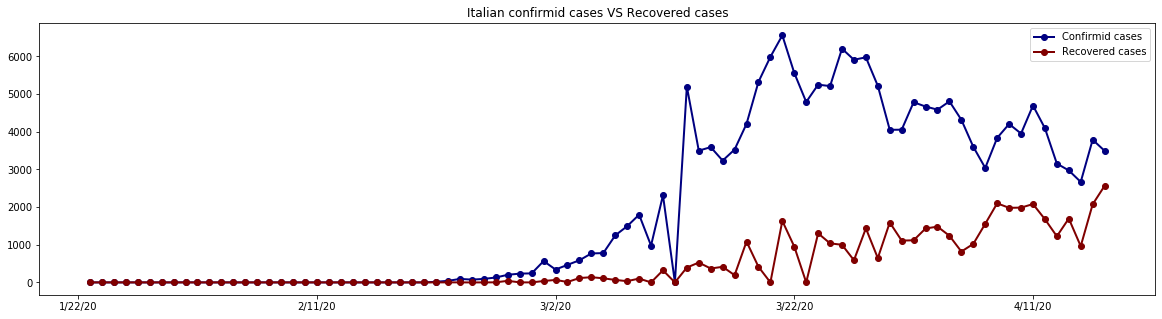

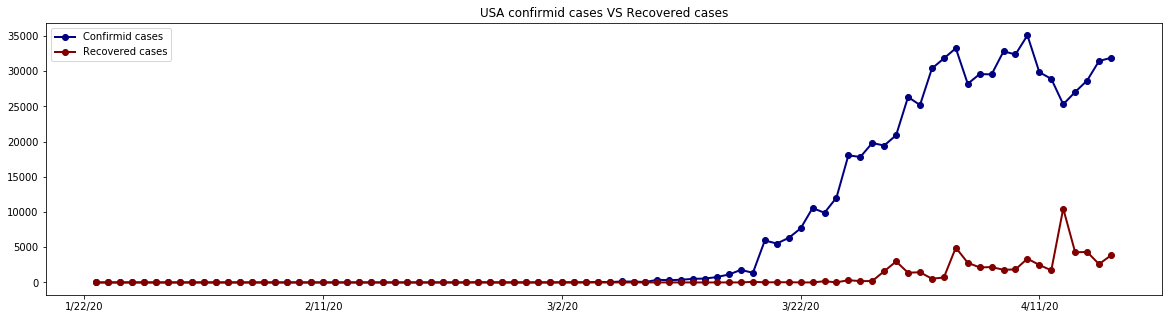

In [11]:
newCasesVsRecoveredPerDay.plot(title='Chinese confirmid cases VS Recovered cases', lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5), y=['China_confirmid', 'China_Recovered']).legend(["Confirmid cases", "Recovered cases"])
newCasesVsRecoveredPerDay.plot(title='Italian confirmid cases VS Recovered cases', lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5), y=['Italy_confirmid', 'Italy_Recovered']).legend(["Confirmid cases", "Recovered cases"])
newCasesVsRecoveredPerDay.plot(title='USA confirmid cases VS Recovered cases', lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5), y=['US_confirmid', 'US_Recovered']).legend(["Confirmid cases", "Recovered cases"])

In [12]:
totalCasesVsRecoveredPerDay = pd.merge(confirmid_cases.totalCasesPerDay, recoveredPerDay, left_index=True, right_index=True, how='outer')
totalCasesVsRecoveredPerDay = totalCasesVsRecoveredPerDay.rename(columns={
    'China_x': 'China_confirmid',
    'China_y': 'China_Recovered',
    'Italy_x': 'Italy_confirmid',
    'Italy_y': 'Italy_Recovered',
    'US_x': 'US_confirmid',
    'US_y': 'US_Recovered'
})
totalCasesVsRecoveredPerDay

Country/Region,China_confirmid,Italy_confirmid,US_confirmid,China_Recovered,Italy_Recovered,US_Recovered
1/22/20,548,0,1,28,0,0
1/23/20,643,0,1,30,0,0
1/24/20,920,0,2,36,0,0
1/25/20,1406,0,2,39,0,0
1/26/20,2075,0,5,49,0,0
...,...,...,...,...,...,...
4/13/20,83213,159516,580619,78039,35435,43482
4/14/20,83306,162488,607670,78200,37130,47763
4/15/20,83356,165155,636350,78311,38092,52096
4/16/20,83403,168941,667801,78401,40164,54703


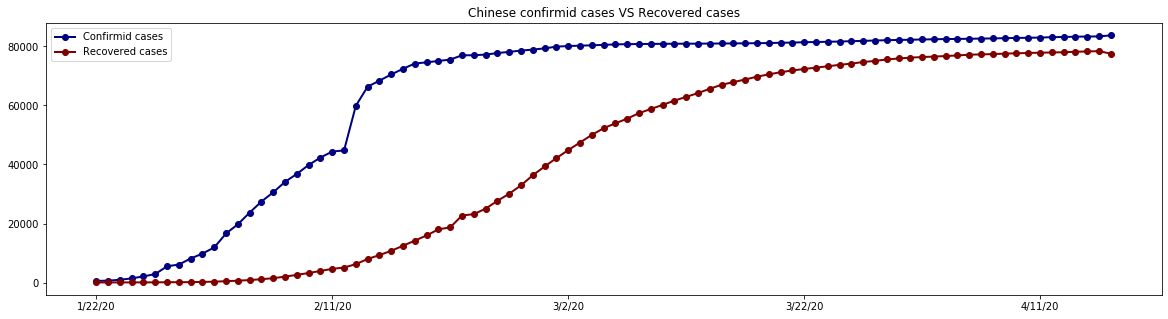

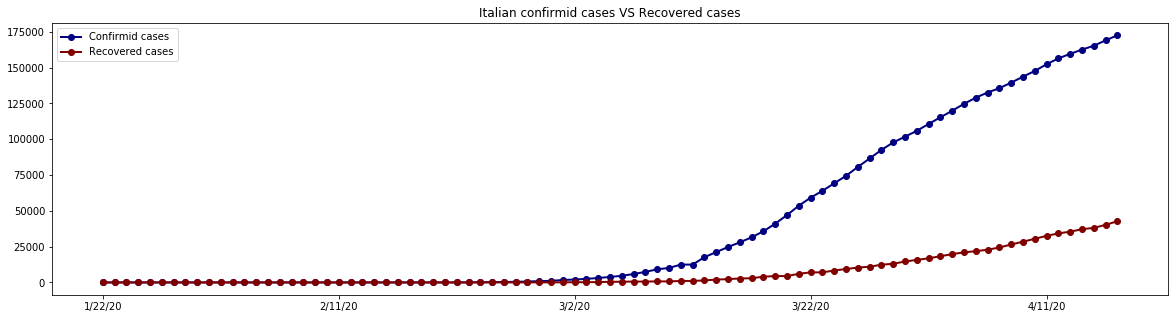

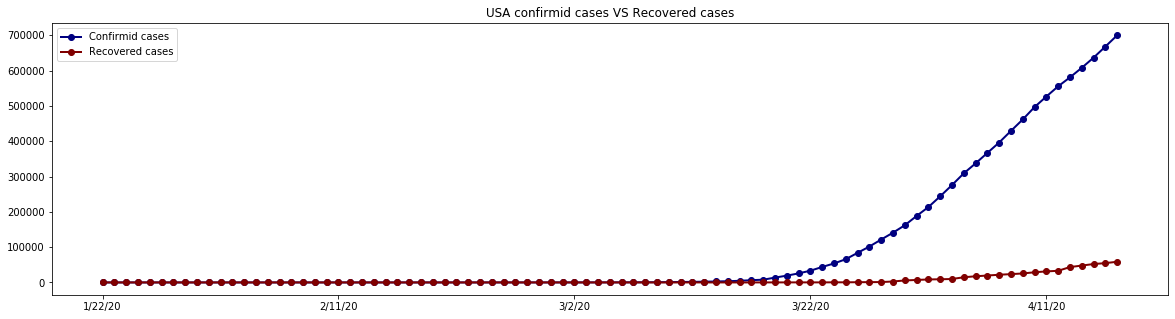

In [13]:
totalCasesVsRecoveredPerDay.plot(title='Chinese confirmid cases VS Recovered cases', lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5), y=['China_confirmid', 'China_Recovered']).legend(["Confirmid cases", "Recovered cases"])
totalCasesVsRecoveredPerDay.plot(title='Italian confirmid cases VS Recovered cases', lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5), y=['Italy_confirmid', 'Italy_Recovered']).legend(["Confirmid cases", "Recovered cases"])
totalCasesVsRecoveredPerDay.plot(title='USA confirmid cases VS Recovered cases', lw=2, colormap='jet', marker='.', markersize=12, figsize=(20,5), y=['US_confirmid', 'US_Recovered']).legend(["Confirmid cases", "Recovered cases"])